In [190]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

In [191]:
# Importing data files

data_df = pd.read_csv("Resources/pollution_2006_2010.csv")
#merged_data_df = pd.read_csv("Resources/merged_output.csv")
#merged_data_df.head()
data_df.head()

,Unnamed: 0,Unnamed: 0.1,County,City,Year,NO2 Units,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,216292,216292,Contra Costa,Concord,2006,Parts per billion,9.478261,21.0,2,20,...,Parts per billion,0.045455,1.0,18,1.0,Parts per million,0.395652,0.7,9,NaN
1,216293,216293,Contra Costa,Concord,2006,Parts per billion,9.478261,21.0,2,20,...,Parts per billion,0.045455,1.0,18,1.0,Parts per million,0.388889,0.5,6,6.0
2,216294,216294,Contra Costa,Concord,2006,Parts per billion,9.478261,21.0,2,20,...,Parts per billion,0.042857,0.3,20,NaN,Parts per million,0.395652,0.7,9,NaN
3,216295,216295,Contra Costa,Concord,2006,Parts per billion,9.478261,21.0,2,20,...,Parts per billion,0.042857,0.3,20,NaN,Parts per million,0.388889,0.5,6,6.0
4,216296,216296,Contra Costa,Concord,2006,Parts per billion,11.521739,20.0,8,19,...,Parts per billion,0.227273,2.0,5,3.0,Parts per million,0.413043,0.6,0,NaN


In [192]:
# Removing decimal and zero from 'Year' column
data_df['Year'] = data_df['Year'].astype(str).replace('\.0', '', regex=True)
data_df.head()

,Unnamed: 0,Unnamed: 0.1,County,City,Year,NO2 Units,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,216292,216292,Contra Costa,Concord,2006,Parts per billion,9.478261,21.0,2,20,...,Parts per billion,0.045455,1.0,18,1.0,Parts per million,0.395652,0.7,9,NaN
1,216293,216293,Contra Costa,Concord,2006,Parts per billion,9.478261,21.0,2,20,...,Parts per billion,0.045455,1.0,18,1.0,Parts per million,0.388889,0.5,6,6.0
2,216294,216294,Contra Costa,Concord,2006,Parts per billion,9.478261,21.0,2,20,...,Parts per billion,0.042857,0.3,20,NaN,Parts per million,0.395652,0.7,9,NaN
3,216295,216295,Contra Costa,Concord,2006,Parts per billion,9.478261,21.0,2,20,...,Parts per billion,0.042857,0.3,20,NaN,Parts per million,0.388889,0.5,6,6.0
4,216296,216296,Contra Costa,Concord,2006,Parts per billion,11.521739,20.0,8,19,...,Parts per billion,0.227273,2.0,5,3.0,Parts per million,0.413043,0.6,0,NaN


#### Generate a summary statistics table of mean, median, variance, and
#### standard deviation for each pollutants verses county

#### Calculations for CO AQI:

In [193]:
# Group by County and aggregate mean, median, variance, standard deviation of the CO (Carbon Mono Oxide) Air Quality Index for each County.
stat_co_df = data_df.groupby(['County', 'Year']).agg({'CO AQI': [np.max, np.min, np.mean, np.median, np.var, np.std]})
stat_co_df.head()

CO AQI                                           
                    amax amin      mean median        var       std
County       Year                                                  
Alameda      2007   18.0  2.0  9.166667    8.0  26.439716  5.141956
             2008   19.0  0.0  4.969613    3.0  16.267402  4.033287
             2009   23.0  1.0  5.671233    3.0  18.223726  4.268926
             2010   18.0  1.0  5.193211    5.0  10.833209  3.291384
Contra Costa 2006   22.0  2.0  5.725342    5.0   7.002989  2.646316

In [194]:
stat_co_df.info()


<class 'pandas.core.frame.DataFrame'>
MultiIndex: 72 entries, ('Alameda', '2007') to ('Solano', '2010')
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (CO AQI, amax)    72 non-null     float64
 1   (CO AQI, amin)    72 non-null     float64
 2   (CO AQI, mean)    72 non-null     float64
 3   (CO AQI, median)  72 non-null     float64
 4   (CO AQI, var)     72 non-null     float64
 5   (CO AQI, std)     72 non-null     float64
dtypes: float64(6)
memory usage: 3.8+ KB


In [195]:
# Rename columns for mean, median, variance, standard deviation of the CO AQI (Carbon Mono Oxide Air Quality Index) for each County.

stat_co_df.columns = ['Max_Value', 'Min_Value', 'Mean', 'Median', 'Variance', 'Standard_Deviation']
stat_co_df.head()

Max_Value  Min_Value      Mean  Median   Variance  \
County       Year                                                      
Alameda      2007       18.0        2.0  9.166667     8.0  26.439716   
             2008       19.0        0.0  4.969613     3.0  16.267402   
             2009       23.0        1.0  5.671233     3.0  18.223726   
             2010       18.0        1.0  5.193211     5.0  10.833209   
Contra Costa 2006       22.0        2.0  5.725342     5.0   7.002989   

                   Standard_Deviation  
County       Year                      
Alameda      2007            5.141956  
             2008            4.033287  
             2009            4.268926  
             2010            3.291384  
Contra Costa 2006            2.646316

In [196]:
# Resetting the Index

co_df = stat_co_df.reset_index()
co_df.head()

,County,Year,Max_Value,Min_Value,Mean,Median,Variance,Standard_Deviation
0,Alameda,2007,18.0,2.0,9.166667,8.0,26.439716,5.141956
1,Alameda,2008,19.0,0.0,4.969613,3.0,16.267402,4.033287
2,Alameda,2009,23.0,1.0,5.671233,3.0,18.223726,4.268926
3,Alameda,2010,18.0,1.0,5.193211,5.0,10.833209,3.291384
4,Contra Costa,2006,22.0,2.0,5.725342,5.0,7.002989,2.646316


In [197]:
grouped_df = co_df.groupby("County")
max_co_aqi = grouped_df.max()
max_co_aqi = max_co_aqi.reset_index()
max_co_aqi.head()

,County,Year,Max_Value,Min_Value,Mean,Median,Variance,Standard_Deviation
0,Alameda,2010,23.0,2.0,9.166667,8.0,26.439716,5.141956
1,Contra Costa,2010,22.0,2.0,5.725342,5.0,7.877080,2.806614
2,Fresno,2010,30.0,1.0,6.619423,5.0,40.912222,6.396266
3,Humboldt,2010,18.0,5.0,8.000000,8.5,13.961659,3.736530
4,Imperial,2010,106.0,6.0,15.680556,13.0,185.843847,13.632456


In [198]:
# Combining two columns
max_co_aqi["County_Year"] = max_co_aqi["County"] + "-" + max_co_aqi["Year"]
max_co_aqi.head()

,County,Year,Max_Value,Min_Value,Mean,Median,Variance,Standard_Deviation,County_Year
0,Alameda,2010,23.0,2.0,9.166667,8.0,26.439716,5.141956,Alameda-2010
1,Contra Costa,2010,22.0,2.0,5.725342,5.0,7.877080,2.806614,Contra Costa-2010
2,Fresno,2010,30.0,1.0,6.619423,5.0,40.912222,6.396266,Fresno-2010
3,Humboldt,2010,18.0,5.0,8.000000,8.5,13.961659,3.736530,Humboldt-2010
4,Imperial,2010,106.0,6.0,15.680556,13.0,185.843847,13.632456,Imperial-2010


#### Visual Representation :

In [199]:
# Converting into list for plotting

county = list(max_co_aqi['County_Year'])
co_aqi = list(max_co_aqi['Mean'])


#### # Creating Scatter Plot for Counties Vs. Average Carbon_monoxide Air Quality Index

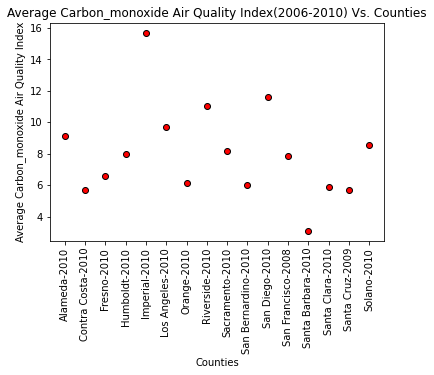

<Figure size 720x2880 with 0 Axes>

In [200]:
# Creating plots for Counties Vs. Average Carbon_monoxide Air Quality Index

plt.scatter(county, co_aqi, marker="o", facecolors="red", edgecolors="black")


# Create a title, x label, and y label for our chart
plt.title("Average Carbon_monoxide Air Quality Index(2006-2010) Vs. Counties")
plt.xlabel("Counties")
plt.ylabel("Average Carbon_monoxide Air Quality Index")

# Save an image of the chart and print to screen
# NOTE: If your plot shrinks after saving an image,
# update matplotlib to 2.2 or higher,
# or simply run the above cells again.

labels = county
plt.xticks(county, labels, rotation='vertical', fontsize=10)


plt.figure(figsize=(10,40))

plt.tight_layout()

plt.savefig('mq_charts/county_avg_co.png')

plt.show()





#### The U.S. National Ambient Air Quality Standards for outdoor air for carbon-monoxide for 8 hours is 9 ppm(parts per million)

#### Average Carbon_monoxide Air Quality Index(2006-2010) Vs. Counties is calculated and and found that 'Imperial' county has the maximum 'Average Carbon_monoxide Air Quality Index' from (2006-2010) of 16 ppm 